In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
asthma = pd.read_csv('merged.csv')
asthma.head()

,Unnamed: 0,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,...,sex,asthma_deaths_per_100k,asthma_lb,asthma_ub,current_smoking_pct,current_smoking_lb,current_smoking_ub,daily_smoker_pct,daily_smoker_lb,daily_smoker_ub
0,0,1996,10001,Delaware,Kent,0.000000,0.00000,0.052134,0.0,0.000000,...,Both,2.016585,1.682840,2.418712,27.85,25.41,30.42,24.97,22.72,27.48
1,1,1996,10003,Delaware,New Castle,0.777178,19.04093,0.045973,0.0,0.349306,...,Both,1.738850,1.518789,2.009553,25.38,23.46,27.31,21.43,19.76,23.18
2,2,1996,10005,Delaware,Sussex,0.000000,0.00000,0.048738,0.0,0.000000,...,Both,1.693894,1.426025,1.998171,28.77,26.22,31.37,25.79,23.31,28.02
3,3,1996,12003,Florida,Baker,0.000000,0.00000,0.040651,0.0,0.000000,...,Both,1.995325,1.561440,2.510761,29.25,24.59,34.13,26.08,21.83,30.95
4,4,1996,12009,Florida,Brevard,0.000000,0.00000,0.038388,0.0,0.000000,...,Both,1.334301,1.149089,1.550314,28.50,24.56,32.46,24.41,21.30,28.26


In [5]:
asthma.columns

Index(['Unnamed: 0', 'year', 'fips', 'state_name', 'county_name',
       'arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',
       'arithmetic_standard_dev|Carbon monoxide',
       'arithmetic_standard_dev|Nitrogen dioxide (NO2)',
       'arithmetic_standard_dev|Ozone',
       'arithmetic_standard_dev|PM2.5 - Local Conditions',
       'fifty_percentile|Carbon monoxide',
       'fifty_percentile|Nitrogen dioxide (NO2)', 'fifty_percentile|Ozone',
       'fifty_percentile|PM2.5 - Local Conditions',
       'first_max_value|Carbon monoxide',
       'first_max_value|Nitrogen dioxide (NO2)', 'first_max_value|Ozone',
       'first_max_value|PM2.5 - Local Conditions',
       'fourth_max_value|Carbon monoxide',
       'fourth_max_value|Nitrogen dioxide (NO2)', 'fourth_max_value|Ozone',
       'fourth_max_value|PM2.5 - Local Conditions',
       'latitude|Nitrogen dioxide (NO2)', 'longitude

In [7]:
X = asthma[['current_smoking_pct','arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
y = asthma[['asthma_ub']].values.reshape(-1, 1)
print(X.shape, y.shape)

(12822, 5) (12822, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [10]:
### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [11]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

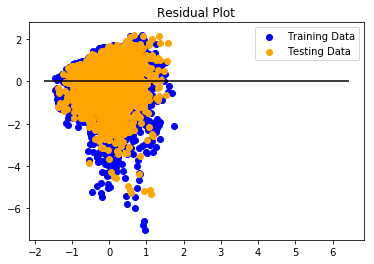

In [14]:
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION